# Income Project

### Problem Statement Scenario:
Many social programs have a hard time ensuring that the right people are given enough aid. It’s tricky when a program focuses on the poorest segment of the population. This segment of the population can’t provide the necessary income and expense records to prove that they qualify.

In Latin America, a popular method called Proxy Means Test (PMT) uses an algorithm to verify income qualification. 
With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls 
and ceiling or the assets found in their homes to classify them and predict their level of need.

## Core Data fields
###### Id - a unique identifier for each row.
###### Target - the target is an ordinal variable indicating groups of income levels.
###### 1 = extreme poverty 2 = moderate poverty 3 = vulnerable households 4 = non vulnerable households
###### idhogar - this is a unique identifier for each household. This can be used to create household-wide features, etc. All ######rows in a given household will have a matching value for this identifier.
###### parentesco1 - indicates if this person is the head of the household.

In [2]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#to remove warnings in the output, import warnings library
import warnings
warnings.filterwarnings('ignore')

In [70]:
#extracting dataset csv file into dataframe
df_train= pd.read_csv(r"D:\simplilearn\Project 1\Dataset for the project\train.csv")

In [71]:
#to display every columns 
#pd.set_option('display.max_columns', None)
# Viewing first 5 rows of the dataset
df_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,"190,000.0000",0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0000,0,0,0,1,0,0,0,0,0,1,1.0000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.0000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,"135,000.0000",0,4,0,1,1,1,1.0000,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0000,0,0,0,0,0,0,0,1,0,1,1.0000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.0000,64.0000,144.0000,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0000,0,0,0,0,1,0,0,0,0,2,0.5000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.2500,64.0000,121.0000,8464,4
3,ID_d671db89c,"180,000.0000",0,5,0,1,1,1,1.0000,0,2,2,1,1,2,1,3,4,4,4,9,1.0000,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0000,0,0,0,1,0,0,0,0,0,3,1.3333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.7778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,"180,000.0000",0,5,0,1,1,1,1.0000,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0000,0,0,0,0,1,0,0,0,0,3,1.3333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.7778,1.0000,121.0000,1369,4


In [5]:
#shape and size of the dataset
print("shape :",df_train.shape)
print("size :",df_train.size)
#There are 9557 rows and 143 cols

shape : (9557, 143)
size : 1366651


### Understand the type of data.

In [6]:
#inforamtion about the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [7]:
#the datatypes of the dataset can be outputted by
df_train.dtypes

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
                    ...   
SQBovercrowding    float64
SQBdependency      float64
SQBmeaned          float64
agesq                int64
Target               int64
Length: 143, dtype: object

<AxesSubplot:ylabel='count'>

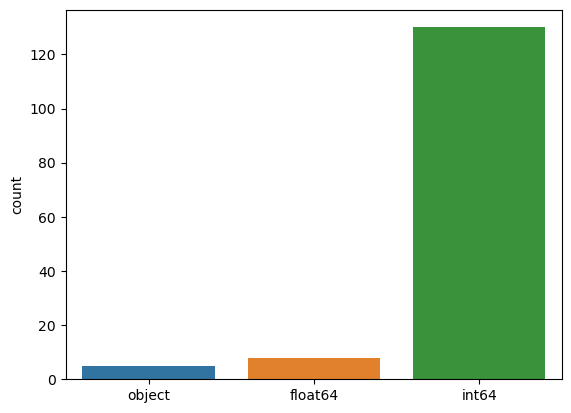

In [8]:
#count of the dataypes
sns.countplot(x=df_train.dtypes, data=df_train)

In [9]:
#description of the dataframe
df_train.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,1629.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.0,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,1.945066,0.399184,1.661714,2.060898,0.785079,3.220885,4.005964,3.999058,4.094590,7.200272,0.459791,3.999058,0.594015,0.077744,0.188030,0.008580,0.115622,0.013079,0.001465,0.001465,0.692791,0.222873,0.000942,0.001046,0.016428,0.065920,0.970074,0.017683,0.003139,0.002197,0.677409,0.964738,0.031705,0.003558,0.885110,0.000314,0.002197,0.110809,0.003872,0.213979,0.764257,0.015381,0.002511,0.001883,0.489589,0.458407,0.050120,0.882704,0.03003,0.084545,0.001465,0.0,0.001256,0.102438,0.327404,0.570158,0.128388,0.288061,0.583551,0.101078,0.252799,0.646123,0.057549,0.483415,0.516585,0.137805,0.123260,0.268390,0.031914,0.062781,0.033169,0.342681,0.311081,0.184054,0.381814,0.012138,0.009522,0.051167,0.010045,0.002407,0.013289,0.003139,0.012661,0.008685,1.406613,2.592445,0.284085,3.999058,9.231523,0.134666,0.170556,0.207701,0.185414,0.112692,0.017893,0.015591,0.139793,0.015381,2.739981,1.605380,0.61850,0.1

In [10]:
df_train.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=143)

### Identify the output variable.-  target is the output variable. It is a nominal value. Indicating groups of income levels. 1 = extreme poverty 2 = moderate poverty 3 = vulnerable households 4 = non vulnerable households. 
### Check if there are any biases in your dataset.

<AxesSubplot:xlabel='Target', ylabel='count'>

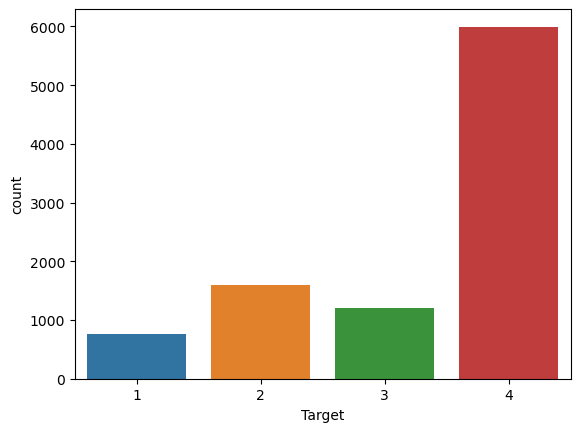

In [59]:
sns.countplot(x='Target',data=df_train)

In [13]:
df_train["Target"].value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

### Check whether all members of the house have the same poverty level.

In [14]:
# Groupby the household and figure out the number of unique values
all_equal = df_train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 85 households where the family members do not all have the same target.


### Check if there is a house without a family head.

In [15]:

# if all families has a head. 

households_head = df_train.groupby('idhogar')['parentesco1'].sum()

# Find households without a head
households_no_head = df_train.loc[df_train['idhogar'].isin(households_head[households_head == 0].index), :]

print('There are {} households without a head.'.format(households_no_head['idhogar'].nunique()))


There are 15 households without a head.


### Set poverty level of the members and the head of the house within a family.

In [16]:
df_income_train = df_train.copy()

In [17]:
#Set poverty level of the members and the head of the house within a family.
# Iterate through each household
for household in not_equal.index:
    # Find the correct label (for the head of household)
    true_target = int(df_income_train[(df_income_train['idhogar'] == household) & (df_income_train['parentesco1'] == 1.0)]['Target'])
    
    # Set the correct label for all members in the household
    df_income_train.loc[df_income_train['idhogar'] == household, 'Target'] = true_target
    
    
# Groupby the household and figure out the number of unique values
all_equal = df_income_train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 0 households where the family members do not all have the same target.


### Count how many null values are existing in columns.

In [58]:
a=df_train.isnull().sum(axis=0)
for i,j in zip(a.index,a.values):
    if j>0:
        print(i,"No of Null values :",j)

v2a1 No of Null values : 6860
v18q1 No of Null values : 7342
rez_esc No of Null values : 7928
meaneduc No of Null values : 5
SQBmeaned No of Null values : 5


In [19]:
df_train.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=143)

In [20]:
for i in df_train.select_dtypes(['object']):
    print("col :",i,"unique :", df_train[i].nunique())


col : Id unique : 9557
col : idhogar unique : 2988
col : dependency unique : 31
col : edjefe unique : 22
col : edjefa unique : 22


In [21]:
df_train['dependency']

0        no
1         8
2         8
3       yes
4       yes
       ... 
9552    .25
9553    .25
9554    .25
9555    .25
9556    .25
Name: dependency, Length: 9557, dtype: object

In [22]:
# It has combination of numbers and characters. We don't have information about it, hence we will drop it. Idhogar,edjefe, edjefa-these variables has also has the same pattern,hence dropping it will be efficient

In [23]:
df=df_train.copy()
df.drop(['Id','idhogar','edjefe','edjefa','dependency'], axis=1,inplace=True)

### Remove null value rows of the target variable.
###### Missing value Treatment

In [24]:
pd.set_option('display.max_rows', None)
df.isna().sum()
missing = df_train.isnull().mean()*100
missing[missing>0]
# If missing values are more than 25% then we will delete the entire column.
# If the missing values are less than 1% then we will delete the rows

v2a1         71.779847
v18q1        76.823271
rez_esc      82.954902
meaneduc      0.052318
SQBmeaned     0.052318
dtype: float64

In [25]:
df.drop(['v2a1','v18q1','rez_esc',],axis=1,inplace=True)

In [26]:
#Median is used for outlier treatment
df['meaneduc']=df['meaneduc'].fillna(df['meaneduc'].median())

In [27]:
df['SQBmeaned']=df['SQBmeaned'].fillna(df['SQBmeaned'].median())

In [28]:
df.isna().sum()

hacdor             0
rooms              0
hacapo             0
v14a               0
refrig             0
v18q               0
r4h1               0
r4h2               0
r4h3               0
r4m1               0
r4m2               0
r4m3               0
r4t1               0
r4t2               0
r4t3               0
tamhog             0
tamviv             0
escolari           0
hhsize             0
paredblolad        0
paredzocalo        0
paredpreb          0
pareddes           0
paredmad           0
paredzinc          0
paredfibras        0
paredother         0
pisomoscer         0
pisocemento        0
pisoother          0
pisonatur          0
pisonotiene        0
pisomadera         0
techozinc          0
techoentrepiso     0
techocane          0
techootro          0
cielorazo          0
abastaguadentro    0
abastaguafuera     0
abastaguano        0
public             0
planpri            0
noelec             0
coopele            0
sanitario1         0
sanitario2         0
sanitario3   

### SMOTEEN is used to rectify misclassification of the model. It is a combinatation of over and under sampling. It uses SMOTE and ENN

In [29]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN(sampling_strategy='all', random_state = 2)
#Fit the model to generate the data.

In [30]:
X, Y = sm.fit_resample(df.drop(['Target'],axis=1), df['Target'])
df_1 = pd.concat([pd.DataFrame(Y), pd.DataFrame(X)], axis=1)
df_1.shape

(14108, 135)

In [31]:
#Checking for the variance
pd.options.display.float_format = '{:,.4f}'.format
variance = df_1.var()
variance = variance.reset_index()
variance.columns = ["id","values"]
variance= variance.sort_values("values",ascending=1)
variance

,id,values
43,planpri,0.0000
59,elimbasu5,0.0000
60,elimbasu6,0.0001
30,pisoother,0.0003
44,noelec,0.0004
31,pisonatur,0.0006
50,sanitario6,0.0006
58,elimbasu4,0.0006
87,parentesco8,0.0006
27,paredother,0.0006


In [32]:
# We will remove the varialbes with variance 0 and low variance (less than 0.2)
# We will also remove id since it has a huge variance
var = variance.loc[variance["values"] < 0.05,"id"]
df_1 = df_1.drop(var,axis=1)
df_1.head()

,Target,rooms,refrig,v18q,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,hhsize,paredblolad,paredpreb,paredmad,pisomoscer,pisocemento,cielorazo,abastaguadentro,public,sanitario2,sanitario3,energcocinar2,energcocinar3,elimbasu1,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil7,parentesco1,parentesco2,parentesco3,hogar_nin,hogar_adul,hogar_mayor,hogar_total,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel8,bedrooms,overcrowding,tipovivi1,tipovivi3,television,mobilephone,qmobilephone,lugar1,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,1,5,1,0,1,1,2,2,1,3,3,2,5,5,5,0,5,0,0,0,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,3,2,0,5,9.5000,1,0,0,0,0,3,1.6667,0,1,0,1,2,1,1,0,3,0,9,25,64,9,2.7778,2.2500,90.2500,9
1,1,5,1,0,1,1,2,2,1,3,3,2,5,5,5,0,5,0,0,0,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,3,2,0,5,9.5000,1,0,0,0,0,3,1.6667,0,1,0,1,2,1,1,0,2,0,4,25,64,9,2.7778,2.2500,90.2500,4
2,1,5,1,0,1,1,2,2,1,3,3,2,5,5,5,0,5,0,0,0,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,3,2,0,5,9.5000,1,0,0,0,0,3,1.6667,0,1,0,1,2,1,1,0,6,0,36,25,64,9,2.7778,2.2500,90.2500,36
3,1,5,1,0,1,1,2,2,1,3,3,2,5,5,5,8,5,0,0,0,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,3,2,0,5,9.5000,0,0,0,1,0,3,1.6667,0,1,0,1,2,1,1,0,27,64,729,25,64,9,2.7778,2.2500,90.2500,729
4,1,5,1,0,1,1,2,2,1,3,3,2,5,5,5,11,5,0,0,0,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,3,2,0,5,9.5000,0,0,0,0,0,3,1.6667,0,1,0,1,2,1,1,0,29,121,841,25,64,9,2.7778,2.2500,90.2500,841


In [33]:
c = df_1.corr().abs()
s = c.unstack()
s = pd.DataFrame(s)
s.reset_index(inplace = True)
import numpy as np
s["flag"] = np.where(s["level_0"] == s["level_1"],"same","not same")
s.columns.values[2] = "corr"
s.head()

,level_0,level_1,corr,flag
0,Target,Target,1.0000,same
1,Target,rooms,0.3376,not same
2,Target,refrig,0.2007,not same
3,Target,v18q,0.3800,not same
4,Target,r4h1,0.1987,not same


In [34]:
# Showing values with high correlation
s.sort_values(["flag","corr"],ascending=[1,0])

,level_0,level_1,corr,flag
1030,tamhog,hhsize,1.0000,not same
1065,tamhog,hogar_total,1.0000,not same
1261,hhsize,tamhog,1.0000,not same
1299,hhsize,hogar_total,1.0000,not same
3991,hogar_total,tamhog,1.0000,not same
3994,hogar_total,hhsize,1.0000,not same
5537,SQBage,agesq,1.0000,not same
6076,agesq,SQBage,1.0000,not same
949,r4t3,tamhog,0.9983,not same
952,r4t3,hhsize,0.9983,not same


In [35]:
# Remove the variables with correlation more than .99
#s.loc[s["flag"] != "same",]
name = s.loc[(s["corr"] > .99) & (s["flag"] != "same") ,"level_1"]
final_name = name.unique()

In [36]:
df_1 = df_1.drop(final_name,axis=1)
df_1.head()

,Target,rooms,refrig,v18q,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,tamviv,escolari,paredblolad,paredpreb,paredmad,pisomoscer,pisocemento,cielorazo,abastaguadentro,public,sanitario2,sanitario3,energcocinar2,energcocinar3,elimbasu1,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil7,parentesco1,parentesco2,parentesco3,hogar_nin,hogar_adul,hogar_mayor,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel8,bedrooms,overcrowding,tipovivi1,tipovivi3,television,mobilephone,qmobilephone,lugar1,area1,area2,age,SQBescolari,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned
0,1,5,1,0,1,1,2,2,1,3,3,2,5,0,0,0,0,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,3,2,0,9.5000,1,0,0,0,0,3,1.6667,0,1,0,1,2,1,1,0,3,0,25,64,9,2.7778,2.2500,90.2500
1,1,5,1,0,1,1,2,2,1,3,3,2,5,0,0,0,0,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,3,2,0,9.5000,1,0,0,0,0,3,1.6667,0,1,0,1,2,1,1,0,2,0,25,64,9,2.7778,2.2500,90.2500
2,1,5,1,0,1,1,2,2,1,3,3,2,5,0,0,0,0,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,3,2,0,9.5000,1,0,0,0,0,3,1.6667,0,1,0,1,2,1,1,0,6,0,25,64,9,2.7778,2.2500,90.2500
3,1,5,1,0,1,1,2,2,1,3,3,2,5,8,0,0,0,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,3,2,0,9.5000,0,0,0,1,0,3,1.6667,0,1,0,1,2,1,1,0,27,64,25,64,9,2.7778,2.2500,90.2500
4,1,5,1,0,1,1,2,2,1,3,3,2,5,11,0,0,0,1,0,1,1,1,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,3,2,0,9.5000,0,0,0,0,0,3,1.6667,0,1,0,1,2,1,1,0,29,121,25,64,9,2.7778,2.2500,90.2500


### Plot a graph to understand the bivariate relationship among some of the variables

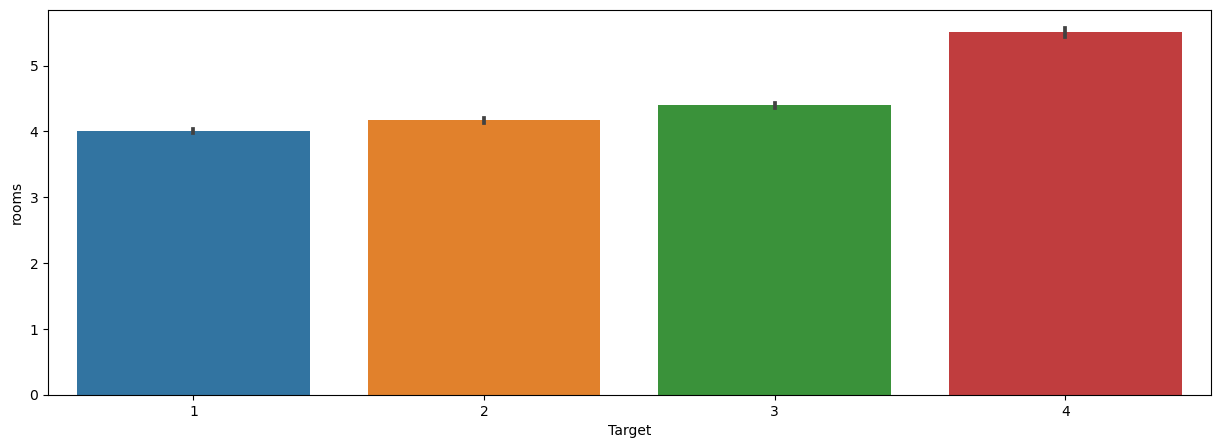

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
sns.barplot(data=df_1,x="Target",y="rooms",dodge=True)
plt.show()
# We can understand that only higher income gorups can afford more number of rooms

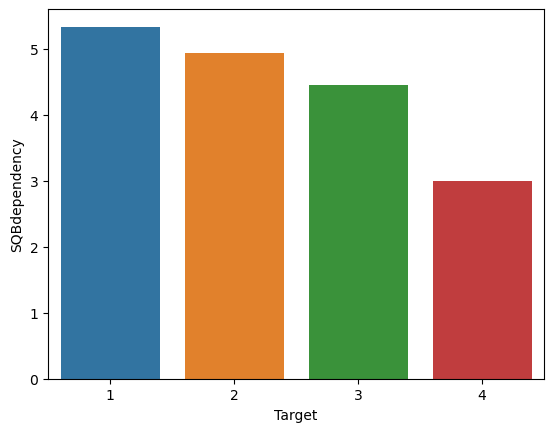

In [60]:
import numpy as np
sns.barplot(data=df_1,x="Target",y="SQBdependency",estimator=np.mean,ci=None)
plt.show()
# Average SQBdependency is higher for the lower income group (Target 1 and 2)

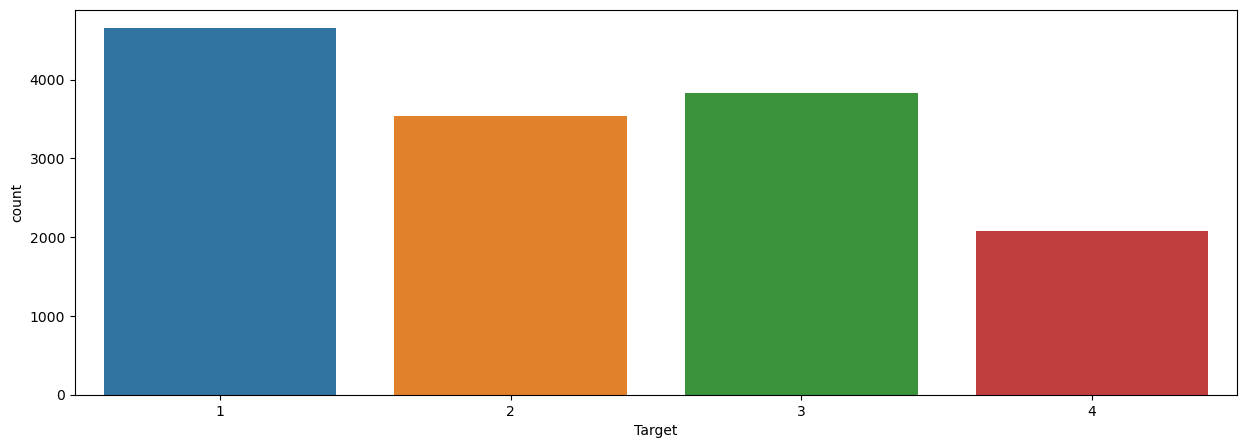

In [39]:
plt.figure(figsize=(15,5))
sns.countplot(data=df_1,x="Target")
plt.show()
# Frequency distribution plot for the dep variable. We can see that maximum data belong to grp 4

<AxesSubplot:>

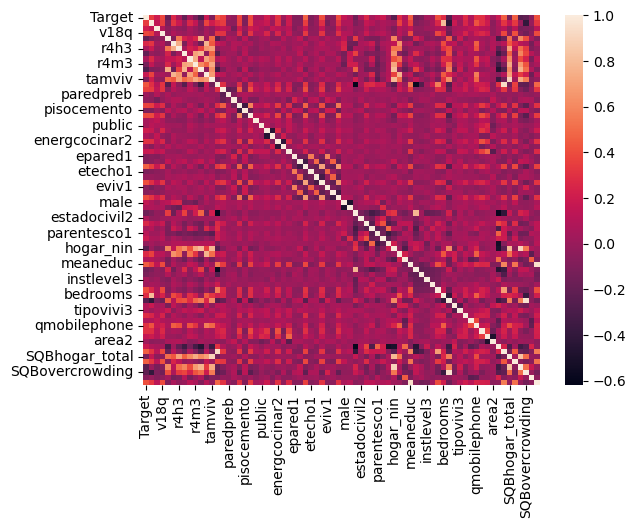

In [40]:
sns.heatmap(data=df_1.corr())

Text(0.5, 1.0, '                                                  Total men and women in the household')

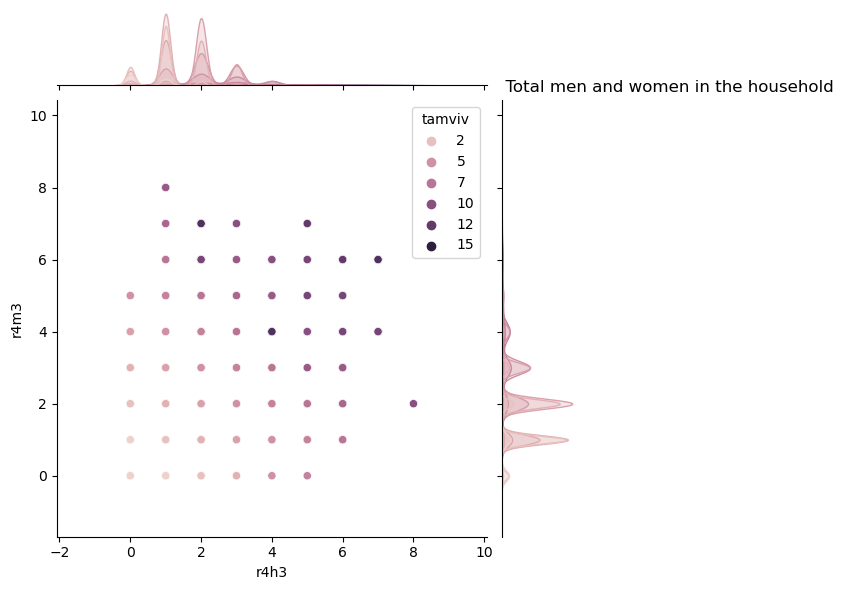

In [64]:
sns.jointplot(x=df_1['r4h3'], y=df_1['r4m3'],hue=df_1['tamviv'])
#r4h3-'Total No of men', 
#r4m3-'Total No of women'
plt.title('Total men and women in the household')
#There is no significant difference between number of men and women in the household. Some houses don't have women while in other cases men are absent.

Text(0, 0.5, 'The household category')

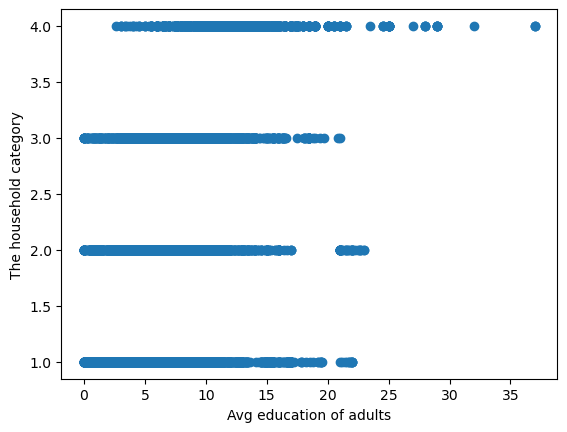

In [61]:
plt.scatter(x='meaneduc', y='Target',data=df_1)
plt.xlabel('Avg education of adults')
plt.ylabel('The household category')
#inference:- The non vulnerable house has more number of adults with average years of education

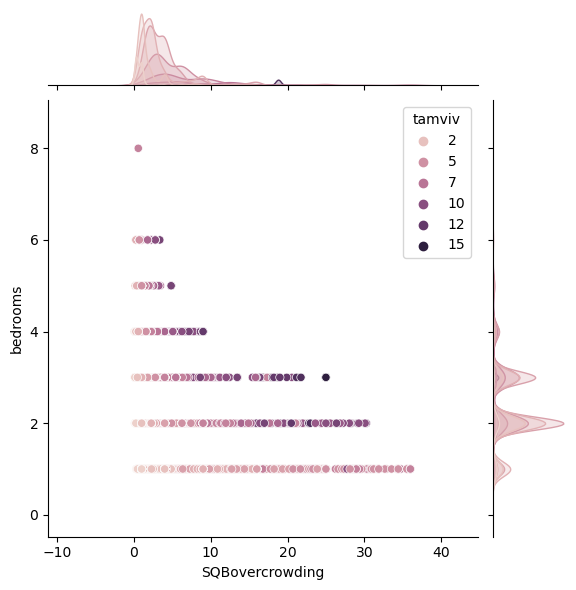

In [68]:
sns.jointplot(x=df_1['SQBovercrowding'], y=df_1['bedrooms'],hue=df_1['tamviv'])
#inference:- Overcrowding with less 
#rooms as seen inthe graph,Overcrowding happens in 1 room household, while no overcrowding with 8 rooms in the household

### Run the Random Forest model and calculate the accuracy

In [44]:
df_1.shape

(14108, 72)

In [45]:
#Let's drop the target coloumn before we do train test split
X = df_1.drop('Target',axis=1)
y = df_1['Target']
#Now we will split the data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000,random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.97      0.98      0.97       958
           2       0.96      0.91      0.94       719
           3       0.94      0.96      0.95       755
           4       0.93      0.94      0.94       390

    accuracy                           0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.95      0.95      0.95      2822



#### We get an accuracy of 95% on the overall data

### Check the accuracy using random forest with cross validation.

In [46]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rf,X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 93.62 %
Standard Deviation: 0.62 %


#### K Fold cross validation shows the average accuracy to be 93.62% with a low standard deviation of 0.62%